## **Installing Libararies**

In [1]:
!pip3 install gensim scipy matplotlib pandas  fasttext

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


## **Import Necessary Libraries**

In [2]:
# imports needed and set up logging
import gensim, codecs


# **Mount Google Drive** 

In [ ]:
# from google.colab import drive
# drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


# **Load Dataset**

In [3]:
filename="Plutarch.txt"



# filename="/content/drive/My Drive/WordEmbedding/reviews_data.txt.gz"


# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = codecs.open(filename, "r", "utf-8")
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

doc = load_doc(filename)


# logging.info ("Done reading data file")




# **Text Pre-processing**

In [4]:
import re 

fpath = '/home/sanju/Documents/WordVecIntro'


def load_doc(filename):
  with open(fpath + '/Plutarch2.txt', 'w') as out_f:
    text = codecs.open(filename, "r", "utf-8").read().lower()
    new_text = re.sub('[^a-z\.\?\!\-\'\:\;]', ' ', text) #keep only wanted characters (alphabet and select punctuation)    
    new_text = re.sub(' +', ' ', new_text) #remove double space
    new_text = re.sub('\n', ' ', new_text) #remove new line
    items = [w for w in new_text.split(' ') if w.strip() != '' or w == '\n']
    unique_items = set(items)
    print("First 1000 characters of the text:\n", new_text[:1000])
    out_f.write(new_text)
    return new_text


clean_doc=load_doc(filename)
# clean_doc


First 1000 characters of the text:
 theseus as geographers sosius crowd into the edges of their maps parts of the world which they do not know about adding notes in the margin to the effect that beyond this lies nothing but sandy deserts full of wild beasts unapproachable bogs scythian ice or a frozen sea so in this work of mine in which i have compared the lives of the greatest men with one another after passing through those periods which probable reasoning can reach to and real history find a footing in i might very well say of those that are farther off beyond this there is nothing but prodigies and fictions the only inhabitants are the poets and inventors of fables; there is no credit or certainty any farther. yet after publishing an account of lycurgus the lawgiver and numa the king i thought i might not without reason ascend as high as to romulus being brought by my history so near to his time. considering therefore with myself whom shall i set so great a man to face? or whom op

In [5]:
import nltk
nltk.download('punkt') #used in Colab
from nltk.tokenize import word_tokenize, sent_tokenize

data = []
for i in sent_tokenize(clean_doc): 
    temp = [] 
    for w in word_tokenize(i): 
        temp.append(w) 
    data.append(temp)
data

[nltk_data] Downloading package punkt to /home/sanju/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[['theseus',
  'as',
  'geographers',
  'sosius',
  'crowd',
  'into',
  'the',
  'edges',
  'of',
  'their',
  'maps',
  'parts',
  'of',
  'the',
  'world',
  'which',
  'they',
  'do',
  'not',
  'know',
  'about',
  'adding',
  'notes',
  'in',
  'the',
  'margin',
  'to',
  'the',
  'effect',
  'that',
  'beyond',
  'this',
  'lies',
  'nothing',
  'but',
  'sandy',
  'deserts',
  'full',
  'of',
  'wild',
  'beasts',
  'unapproachable',
  'bogs',
  'scythian',
  'ice',
  'or',
  'a',
  'frozen',
  'sea',
  'so',
  'in',
  'this',
  'work',
  'of',
  'mine',
  'in',
  'which',
  'i',
  'have',
  'compared',
  'the',
  'lives',
  'of',
  'the',
  'greatest',
  'men',
  'with',
  'one',
  'another',
  'after',
  'passing',
  'through',
  'those',
  'periods',
  'which',
  'probable',
  'reasoning',
  'can',
  'reach',
  'to',
  'and',
  'real',
  'history',
  'find',
  'a',
  'footing',
  'in',
  'i',
  'might',
  'very',
  'well',
  'say',
  'of',
  'those',
  'that',
  'are',
  'f

# **Train Model using Word2Vec**

In [6]:
from gensim.models import Word2Vec

model_cbow = Word2Vec(data, min_count = 1,  size = 100, window = 8, iter=5, sg=0, hs=0) 
model_sgram = Word2Vec(data, min_count = 1,  size = 100, window = 8, negative =5, iter=5, sg=1, hs=0) 
model_cbow_hs = Word2Vec(data, min_count = 1,  size = 100, window = 8, iter=5, sg=0, hs=1) 
model_sgram_hs = Word2Vec(data, min_count = 1,  size = 100, window = 8, iter=5, sg=1, hs=1)



# **Save model**

In [7]:
model_sgram.save(fpath + '/model_sgram.bin')

# **Most similar**

In [ ]:
fpath = '/home/sanju/Documents/WordVecIntro'
model_sgram=gensim.models.KeyedVectors.load_word2vec_format (fpath + '/model_sgram.txt')
model_sgram.most_similar('darius')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('aegeus', 0.9164010286331177),
 ('cyrus', 0.9159225821495056),
 ('craterus', 0.9083465337753296),
 ('murdered', 0.9066027998924255),
 ('lacedaemon', 0.9038890600204468),
 ('cleombrotus', 0.9030388593673706),
 ('hortensius', 0.903015673160553),
 ('trebonius', 0.9018473625183105),
 ('domitius', 0.9016000628471375),
 ('charon', 0.9015102982521057)]

# **Train Fasttext**

In [ ]:
import fasttext

# Skipgram model :
FstSGModel = fasttext.train_unsupervised( fpath +'/Plutarch2.txt', model='skipgram')

# or, cbow model :
# model = fasttext.train_unsupervised('data.txt', model='cbow')

FstSGModel.save_model(fpath + "/FstModelplutarch.bin")


In [ ]:
FstSGModel.get_nearest_neighbors('caesar', k=5)

[(0.9818792343139648, 'caesar;'),
 (0.980682373046875, 'caesar.'),
 (0.9635604619979858, "caesar's"),
 (0.926558256149292, 'caesars'),
 (0.9204503297805786, 'pompey')]

In [ ]:
from gensim.models import FastText
GFstSGModel = FastText(data, size=300, window=5, min_count=5, workers=4,sg=1)

In [ ]:
GFstSGModel.save(fpath+ '/GFstSGModel.bin')

GFstSGModel.wv.most_similar("caesar")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('caesars', 0.9190975427627563),
 ('pompey', 0.8907049894332886),
 ('antony', 0.8558812141418457),
 ('lucullus', 0.8549051880836487),
 ('caepio', 0.8469823598861694),
 ('sylla', 0.8427470326423645),
 ('tullus', 0.8425524234771729),
 ('darius', 0.8421540260314941),
 ('pompeius', 0.8404480218887329),
 ('marcellus', 0.8395451307296753)]

In [ ]:
def analogy(x1, x2, y1):
    result = model_sgram.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]



In [ ]:
analogy('leonidas', 'sparta', 'theseus')


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'athens'

In [ ]:
model_sgram.wv.doesnt_match(["theseus","perseus","athens"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'athens'

# **Load Tamil WordVectors**

In [ ]:
import fasttext
FstModel = fasttext.load_model(fpath + '/FstModelTamil.bin')

In [ ]:
FstModel.get_nearest_neighbors('சுறா', k=5)

[(0.999989926815033, 'சுறா,'),
 (0.999984085559845, 'சுறாக்கள்'),
 (0.9999780058860779, 'இவற்றின்'),
 (0.9999765753746033, 'கி.மீ.'),
 (0.999976396560669, 'மணிக்கு')]

# **Load Pre-trained models (Online)**

In [ ]:
import gensim.downloader as api

# Show all available models in gensim-data

print(list(api.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
glove_vectors = api.load('glove-twitter-25',)


[=========================================---------] 82.2% 86.1/104.8MB downloaded

In [ ]:
glove_vectors.save_word2vec_format(fpath + '/glove-twitter.txt', binary=False)

In [ ]:
glove_vectors.most_similar('twitter')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('facebook', 0.9480051398277283),
 ('tweet', 0.9403422474861145),
 ('fb', 0.9342358708381653),
 ('instagram', 0.9104823470115662),
 ('chat', 0.8964964747428894),
 ('hashtag', 0.8885936141014099),
 ('tweets', 0.8878157734870911),
 ('tl', 0.8778461813926697),
 ('link', 0.877821147441864),
 ('internet', 0.8753897547721863)]

# **Convert Word vectors binary (.bin) to text file (.txt)**

In [ ]:


model = gensim.models.KeyedVectors.load_word2vec_format(fpath + '/model_sgram.bin', binary=True)
model_sgram.wv.save_word2vec_format(fpath + '/model_sgram.txt', binary=False)  

# model_sgram.wv.save_word2vec_format(fpath + '/model_sgram.txt', binary=True)  

# **An example how to use trained embeddings of gensim in Keras**

In [ ]:
def get_embedding_weights(gensim_model, tokenizer, max_num_words, embedding_dim):
    model = gensim.models.KeyedVectors.load_word2vec_format(gensim_model)
    embedding_matrix = np.zeros((max_num_words, embedding_dim))
    for word, i in tokenizer.word_index.items():
        if word in model.wv.vocab and i < max_num_words:
            embedding_vector = model.wv.vectors[model.wv.vocab[word].index]
            embedding_matrix[i] = embedding_vector
    return embedding_matrix
    

emb_weights = get_embedding_weights(gensim_model=fpath + '/model_sgram.bin',
                                    tokenizer=tokenizer,
                                    max_num_words=MAX_NUM_WORDS,
                                    embedding_dim=EMBEDDING_DIM
                                   )

embedding_layer = Embedding(input_dim=MAX_NUM_WORDS,
                            output_dim=EMBEDDING_DIM,
                            input_length=MAX_SEQ_LENGTH,
                            weights=[emb_weights],
                            trainable=False
                           )

# **TSNE Visualization**

In [ ]:
import io
import numpy as np

def load_vec(emb_path, nmax=50000):
    vectors = []
    word2id = {}
    with io.open(emb_path, 'r', encoding='utf-8', newline='\n', errors='ignore') as f:
        next(f)
        for i, line in enumerate(f):
            word, vect = line.rstrip().split(' ', 1)
            vect = np.fromstring(vect, sep=' ')
            #assert word not in word2id, 'word found twice'
            vectors.append(vect)
            word2id[word] = len(word2id)
            if len(word2id) == nmax:
                break
    id2word = {v: k for k, v in word2id.items()}
    embeddings = np.vstack(vectors)
    return embeddings, id2word, word2id

In [ ]:
# src_words =[u'விமர்சித்தார்',u'ஒருமனதாக',u'கவர்வதாக',u'கவரப்பட்ட',u'கல்லீரல்',u'செல்',u'தாய்மை',u'தாய்']
# src_path = '/home/sanjana/glve_ttst.txt'
tgt_words =[u'theseus',u'athens',u'perseus','sparta' ,'roman', u'xerxes',u'persia', 'themistocles', 'artemisia']
tgt_path = fpath + '/model_sgram.txt'


nmax = 69000  # maximum number of word embeddings to load

# src_embeddings, src_id2word, src_word2id = load_vec(src_path, nmax)
tgt_embeddings, tgt_id2word, tgt_word2id = load_vec(tgt_path, nmax)
# bilb_embeddings, bilb_id2word, bilb_word2id = load_vec(bilb_path, nmax)

# assert words in dictionaries
for tw in tgt_words:
    assert tw in tgt_word2id, '"%s" not in source dictionary' % tw

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from sklearn.manifold import TSNE


def display_closestwords_tsnescatterplot(src_words, src_word2id, src_emb):

    prop = fm.FontProperties(fname= fpath + '/ARIALUNI.TTF')

    # get close words
    Y = []
    word_labels = []
    for sw in src_words:
        Y.append(src_emb[src_word2id[sw]])
        word_labels.append(sw)
   # close_words = model.similar_by_word(word)
  #  print close_words
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, n_iter=4000, perplexity=30, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(Y)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.figure(figsize=(10, 10), dpi=70)
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=20,fontproperties=prop)
    plt.xlim(x_coords.min()+0.2, x_coords.max()+0.2)
    plt.ylim(y_coords.min()+0.2, y_coords.max()+0.2)
    plt.show()

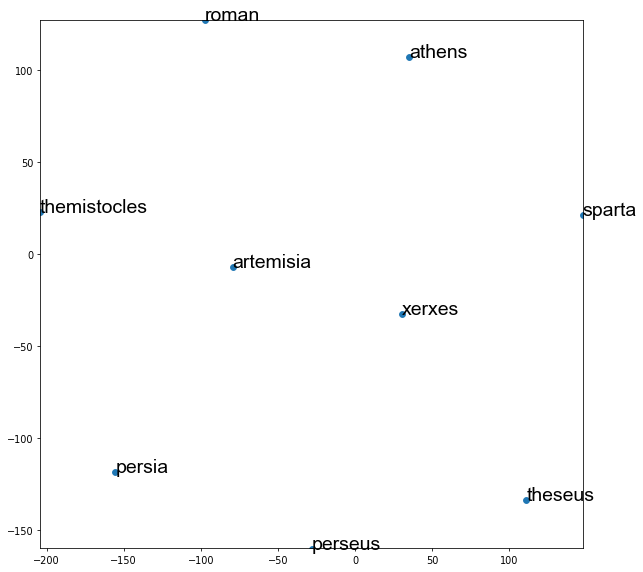

In [ ]:
display_closestwords_tsnescatterplot(tgt_words, tgt_word2id, tgt_embeddings)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from sklearn.manifold import TSNE 

def plot_similar_word(src_words, src_word2id, src_emb, tgt_words, tgt_word2id, tgt_emb):

    prop = fm.FontProperties(fname= fpath + '/ARIALUNI.TTF')
#     en_prop = fm.FontProperties(fname='/home/sanjana/Documents/Python_pgms/AbhayaLibre-Bold.ttf')
    tw_labels= [u'குழந்தை_child', u'மருத்துவர்_doctor', u'கிரேப்ஸ்_grapes', u'தாய்_mother',u'மலர்கள்_flowers']
    Y = []
    word_labels = []
    for sw in src_words:
        Y.append(src_emb[src_word2id[sw]])
        word_labels.append(sw)
    for tw in tgt_words:
        Y.append(tgt_emb[tgt_word2id[tw]])
#         word_labels.append(tw)
    
    for tl in  tw_labels:
        word_labels.append(tl)

    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(Y)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]

    # display scatter plot
    plt.figure(figsize=(8, 8), dpi=60, frameon=False)
    plt.scatter(x_coords, y_coords, marker='x')
    plt.axis('off')

    for k, (label, x, y) in enumerate(zip(word_labels, x_coords, y_coords)):
        if k < len(src_words):
            color = 'blue' 
            fontproperties= prop
        else:
            color = 'red'
            fontproperties = prop # src words in blue / tgt words in red
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=19,
                     color=color, fontproperties=fontproperties, weight='bold')

    plt.xlim(x_coords.min() - 0.2, x_coords.max() + 0.2)
    plt.ylim(y_coords.min() - 0.2, y_coords.max() + 0.2)
#     plt.title('Visualization of the multilingual word embedding space')

    plt.show()

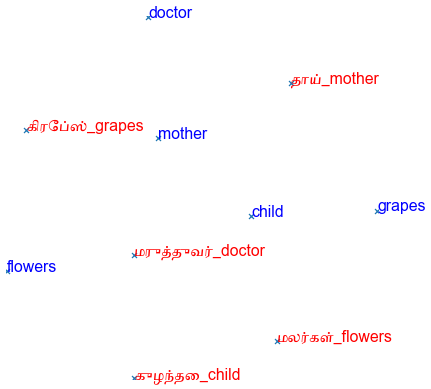

In [ ]:
# get 5 random input words
# src_words = ['zoological', 'tends', 'cash', 'equilibrium', 'apple']
# tgt_words = [u'விலங்கியல்',  u'இருந்தாலும்', u'நிதி', u'சமநிலை', u'ஆப்பிள்']

src_words = ['child','doctor','grapes', 'mother', 'flowers']
tgt_words = [u'குழந்தை', u'மருத்துவர்', u'கிரேப்ஸ்', u'தாய்',u'மலர்கள்']

src_path = fpath + '/samewordvec.txt'
tgt_path = fpath + '/samtwordvec.txt'
# tgt_words = [u'குழந்தை_child', u'மருத்துவர்_doctor', u'ஆப்பிள்_apple',u'பணம்',u'மலர்கள்_flowers']

src_embeddings, src_id2word, src_word2id = load_vec(src_path, nmax)
tgt_embeddings, tgt_id2word, tgt_word2id = load_vec(tgt_path, nmax) 

# assert words in dictionaries
# for sw in src_words:
#     assert sw in src_word2id, '"%s" not in source dictionary' % sw
# for tw in tgt_words:
#     assert tw in tgt_word2id, '"%s" not in target dictionary' % sw

plot_similar_word(src_words, src_word2id, src_embeddings, tgt_words, tgt_word2id, tgt_embeddings)

# **Document Vectors**

In [1]:
from gensim.test.utils import common_texts

from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]

DocModel = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)
    
DocVector = DocModel.infer_vector(["system", "response"])